In [1]:
from mapillarywrapper.client import client
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [2]:
"""the object takes a clientid"""
CLIENT_ID = 'c1hsc1BzRGY2ZXBQR1FCY1JIaUJRQTpjOTZmZThjNjkwYmI5MTQx'
example = client.MapClient(CLIENT_ID)

### the trafficinfo method takes several arguments. 
* lowerbbox - A lowerleft coordinate lat/long as a list
* upperbbox - An upperright coordinate lat/long as a list
* value  - (optional) specifies the type of signs, complete list: https://www.mapillary.com/developer/api-documentation/#traffic-signs
    * if the value arguement is empty it'll return all traffic signs in the bounding box
* perpage - a number of how many items to return

BoxPlot from: https://boundingbox.klokantech.com/

In [3]:
# Example
los_angeles_lowerbb = [33.703622, -118.668187]
los_angeles_upperbb = [34.337306, -118.155295]
ten_dict = example.trafficinfo(los_angeles_lowerbb, los_angeles_upperbb, value='regulatory--stop--g1', perpage=1000)

In [5]:
# return a dataframe from the variable of the wrapper
df = pd.DataFrame(ten_dict)
df

,accuracy,altitude,direction,first_seen_at,last_seen_at,key,layer,value,coordinates,geometry_type
0,11.390062,99.691960,159.040950,2019-01-29T21:50:48.601Z,2019-01-29T21:50:49.887Z,ezffyyem722bnibocztiw53w3d,trafficsigns,information--highway-exit--g1,"[-118.30531073700487, 34.08916803056195]",Point
1,7.369946,108.728790,85.635040,2019-01-29T21:17:32.802Z,2019-01-29T21:17:34.076Z,w4epz3w2c64yqvblrykgvt38g3,trafficsigns,regulatory--no-right-turn--g1,"[-118.23009146291241, 34.0712097338355]",Point
2,7.742330,55.296660,154.646030,2016-10-20T22:35:47.336Z,2018-12-19T22:23:17.569Z,sm4gp1wu45lpvwppp2kt4pl73z,trafficsigns,information--general-directions--g1,"[-118.36158382222654, 34.0657895882997]",Point
3,14.701542,59.816902,288.312770,2017-03-14T16:14:15.000Z,2017-03-14T16:14:16.000Z,xkei4rtirzsctlun8phksi8t94,trafficsigns,regulatory--no-left-turn--g1,"[-118.36068850937771, 34.06644012566849]",Point
4,14.151410,50.490784,121.703230,2016-08-02T15:56:51.400Z,2016-08-02T15:56:53.392Z,tl4z5it5ky6jiw79rx05vw3d89,trafficsigns,regulatory--end-of-school-zone--g1,"[-118.36423869552011, 34.05910444423787]",Point
...,...,...,...,...,...,...,...,...,...,...
995,0.839655,218.300450,104.995285,2017-05-31T13:44:50.000Z,2017-06-03T16:13:48.000Z,qgebt86rwmmzqhob4b8cfhkwf2,trafficsigns,regulatory--stop--g1,"[-118.45075368909639, 34.18270671005992]",Point
996,0.675315,218.431980,120.412445,2017-05-31T13:44:53.000Z,2017-06-03T16:13:43.000Z,i6q4v8uf4cjnt0iarvj30u0khw,trafficsigns,regulatory--parking-restrictions--g2,"[-118.45050267939833, 34.18269257795197]",Point
997,0.739636,181.538680,253.844900,2017-05-17T11:06:46.000Z,2019-08-03T12:53:09.000Z,xj0pld99mz624fd14pcj96xdfq,trafficsigns,information--general-directions--g1,"[-118.35188999976884, 34.16612576834519]",Point
998,1.162241,181.298340,173.642650,2017-05-17T08:26:16.000Z,2019-08-03T12:52:41.000Z,zoyv3jbf21p46fxk0u9zr5ge3c,trafficsigns,warning--texts--g1,"[-118.35222063466092, 34.166801563218996]",Point


<AxesSubplot:>

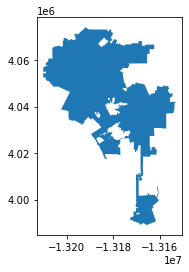

In [6]:
geo_df = gpd.read_file('map_files/CityBoundary.shp')
geo_df.head()
geo_df.plot()